<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions_DataExploration_colab_1_4_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For colab
%pip install umap-learn
%pip install hdbscan

     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 1.2MB 4.3MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=31328c146cd86f4e209b9ad641fa20fc4c55da05d80ce41f937c51e8ad72afc3
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=d18f1921bc2a317d83410dcd6852b18ad1e81230e6d666f913be2d70b950baec
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311743 sha256=80ca4d1c8a3c76815fccf313d8353f48e

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "https://kt-cloud.ijs.si/index.php/s/zyLj9jkFQFqJfoQ/download"

In [4]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows= range(150,155))

In [5]:
# Show data size
df.shape

(149, 81)

In [6]:
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,...,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,...,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,...,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,...,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN

In [7]:
# Remove duplicate features and "Subject" feature.
dup_feat = ["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"] 
df_reduced = df.drop(dup_feat, axis=1)

In [8]:
df_reduced.shape

(149, 58)

In [9]:
# Remove feature specific to Question #3 "DSS_can_improve_your_productivity_Cat"
removed_featuresQ3 = ["Country", "ProductionUse_selling", "Farm_type_Conventional", "Farm_type_Intergrated", "Farm_type_Organic",
             "Farm_type_Biodynamic", "Proportion_of_income", "Production_level_1to3", "Crop_Group_Cat", "Own_phone", "Years_own_phone", 
             "Use_DSS_App", "Agricultural_app_use_Cat", "Computer_at_home", "Speed_internet_Cat", "How_do_you_access_DSS_Cat", "Potencial_user_of_platform", 
             "Prefered_access_Phone", "Prefered_access_PC", "Prefered_access_Advisor", "Willing_to_try_new_products_Cat", "Price_important_factor", 
             "Prefered_type_Web_1", "Prefered_type_Software_2", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
             "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", 
             "Trust_in_colleague_advice_1to3", "Trust_advice_friend_1to3", "Need_IT_teaching_Cat",
              "CL_Output_preference_Graphical_1", "CL_Output_preference_Textual_2",
             "CL_Output_preference_Both_3", "Share_DSS_exp_with_colleague_Cat", "Use_DSS_from_trusted_sources_Always", "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat",
             "Use_same_DSS_than_advisor_Cat", "Age_of_DSS_user_at_the_farm_1", 
             "Age_of_DSS_user_at_the_farm_2", "Age_of_DSS_user_at_the_farm_3", "Marketing_info_about_DSS_Cat"]
df_reducedQ3 = df_reduced.copy().drop(removed_featuresQ2, axis=1)

In [10]:
df_reducedQ3.shape

(149, 13)

In [11]:
df_reducedQ3

,Region,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,Income_Cat,Legislative_requirements,Already_used_DSS,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Trust_in_DSS_1to3,DSS_can_improve_your_productivity_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,4,1.0,1.0,5.0,NaN,1.0,0.0,NaN,NaN,1.0,1.0,1.0
1,south_EU,4,1.0,2.0,4.0,2.0,NaN,NaN,NaN,NaN,2.0,3.0,2.0
2,south_EU,2,1.0,2.0,5.0,2.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0
3,south_EU,2,1.0,2.0,4.0,5.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0
4,south_EU,2,1.0,2.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,4,1.0,2.0,3.0,2.0,1.0,NaN,1.0,0.0,2.0,2.0,1.0
145,south_EU,3,1.0,NaN,3.0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0
146,south_EU,2,1.0,3.0,5.0,4.0,0.0,NaN,1.0,1.0,2.0,3.0,1.0
147,south_EU,3,1.0,2.0,3.0,3.0,1.0,NaN,0.0,1.0,2.0,4.0,1.0


In [12]:
# One hot encode categorical data.
#ohe_df = pd.get_dummies(df, columns=["Region", "Country"])
ohe_df = pd.get_dummies(df_reducedQ3, columns=["Region"])

#ohe_df = df_reducedQ2.copy()

### Missing values

In [13]:
# Show Missing values
ohe_df.isnull().sum()

Age_Cat                                         0
Gender_1male                                    1
Degree_Cat                                      5
Farm_size_Cat                                   1
Income_Cat                                      5
Legislative_requirements                       11
Already_used_DSS                               15
DSS_are_more_suited_for_ShortTermDecision_1     7
DSS_are_more_suited_for_LongTermDecision_2      7
Trust_in_DSS_1to3                               1
DSS_can_improve_your_productivity_Cat           2
Manufacturer_demo_of_DSS_Cat                    6
Region_central_EU                               0
Region_north_EU                                 0
Region_south_EU                                 0
dtype: int64

In [14]:
df_noNaN = ohe_df.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
#df_noNaN = df.dropna(how="any").copy()

# try scikit learn

In [15]:
df_noNaN.isnull().sum()

Age_Cat                                        0
Gender_1male                                   0
Degree_Cat                                     0
Farm_size_Cat                                  0
Income_Cat                                     0
Legislative_requirements                       0
Already_used_DSS                               0
DSS_are_more_suited_for_ShortTermDecision_1    0
DSS_are_more_suited_for_LongTermDecision_2     0
Trust_in_DSS_1to3                              0
DSS_can_improve_your_productivity_Cat          0
Manufacturer_demo_of_DSS_Cat                   0
Region_central_EU                              0
Region_north_EU                                0
Region_south_EU                                0
dtype: int64

In [16]:
df_noNaN.shape

(114, 15)

In [17]:
df_noNaN = df_noNaN.astype("int64")
df_noNaN

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,Income_Cat,Legislative_requirements,Already_used_DSS,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Trust_in_DSS_1to3,DSS_can_improve_your_productivity_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU
2,2,1,2,5,2,1,0,1,0,2,3,2,0,0,1
3,2,1,2,4,5,1,0,0,1,1,3,1,0,0,1
4,2,1,2,5,5,1,1,1,0,1,3,2,0,0,1
5,1,1,2,2,1,0,1,1,0,1,2,2,0,0,1
6,1,1,2,3,1,0,1,1,0,2,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,2,1,1,0,1,0,1,2,3,2,0,0,1
131,2,1,2,3,2,0,1,0,1,3,4,2,0,0,1
135,3,1,2,3,3,0,1,1,0,1,2,1,0,0,1
137,1,1,1,5,4,0,1,0,1,2,4,2,0,0,1


In [18]:
df_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 2 to 148
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Age_Cat                                      114 non-null    int64
 1   Gender_1male                                 114 non-null    int64
 2   Degree_Cat                                   114 non-null    int64
 3   Farm_size_Cat                                114 non-null    int64
 4   Income_Cat                                   114 non-null    int64
 5   Legislative_requirements                     114 non-null    int64
 6   Already_used_DSS                             114 non-null    int64
 7   DSS_are_more_suited_for_ShortTermDecision_1  114 non-null    int64
 8   DSS_are_more_suited_for_LongTermDecision_2   114 non-null    int64
 9   Trust_in_DSS_1to3                            114 non-null    int64
 10  DSS_can_improve_your_produ

### Changing data types to categorical (ordinal) and separating dataframes

In [19]:
"""
# Make CategoricalDtype parameter for ordered features.
oct = CategoricalDtype(ordered=True) 

# Make df with all unordered categorical data
uo_cat_df = ohe_df.astype("category")

# Make final cat_df with unordered and ordered categorical features and two numeric features
cat_df = uo_cat_df
cat_df[num_feat] = cat_df[num_feat].astype("float64")

# {name: oct for name in ord_feat}
cat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,
                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, 
                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, 
                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_teaching_Cat":oct,
                        "DSS_must_be_tailored_for_your_farm_Cat":oct, "Marketing_info_about_DSS_Cat":oct
                       })
"""

'\n# Make CategoricalDtype parameter for ordered features.\noct = CategoricalDtype(ordered=True) \n\n# Make df with all unordered categorical data\nuo_cat_df = ohe_df.astype("category")\n\n# Make final cat_df with unordered and ordered categorical features and two numeric features\ncat_df = uo_cat_df\ncat_df[num_feat] = cat_df[num_feat].astype("float64")\n\n# {name: oct for name in ord_feat}\ncat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,\n                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, \n                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, \n                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_t

In [20]:
# # List of ordinal features
# ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
#             "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
#             "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
#             "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
#             "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat"]

# # List of numeric features
# num_feat = ["Years_own_phone", "Proportion_of_income"]

# # nom_feat = []

In [21]:
# Adapted for Question #1 "Already_used_DSS"
# List of ordinal features
old_ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat", "Manufacturer_demo_of_DSS_Cat"]

ord_feat = [_ for _ in old_ord_feat if _ not in removed_featuresQ2]
ord_feat

# No numeric features
#num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [22]:
# df with ordinal and numeric featureas only
#ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()
ordnum_df = df_noNaN[ord_feat]

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
# binarizarja ta dva
nom_df = df_noNaN[nom_col_names]

# Dimensionality reduction

### Ordinal and numeric features

Text(0.5, 1.0, 'UMAP projection of ordinal IPM farmers data')

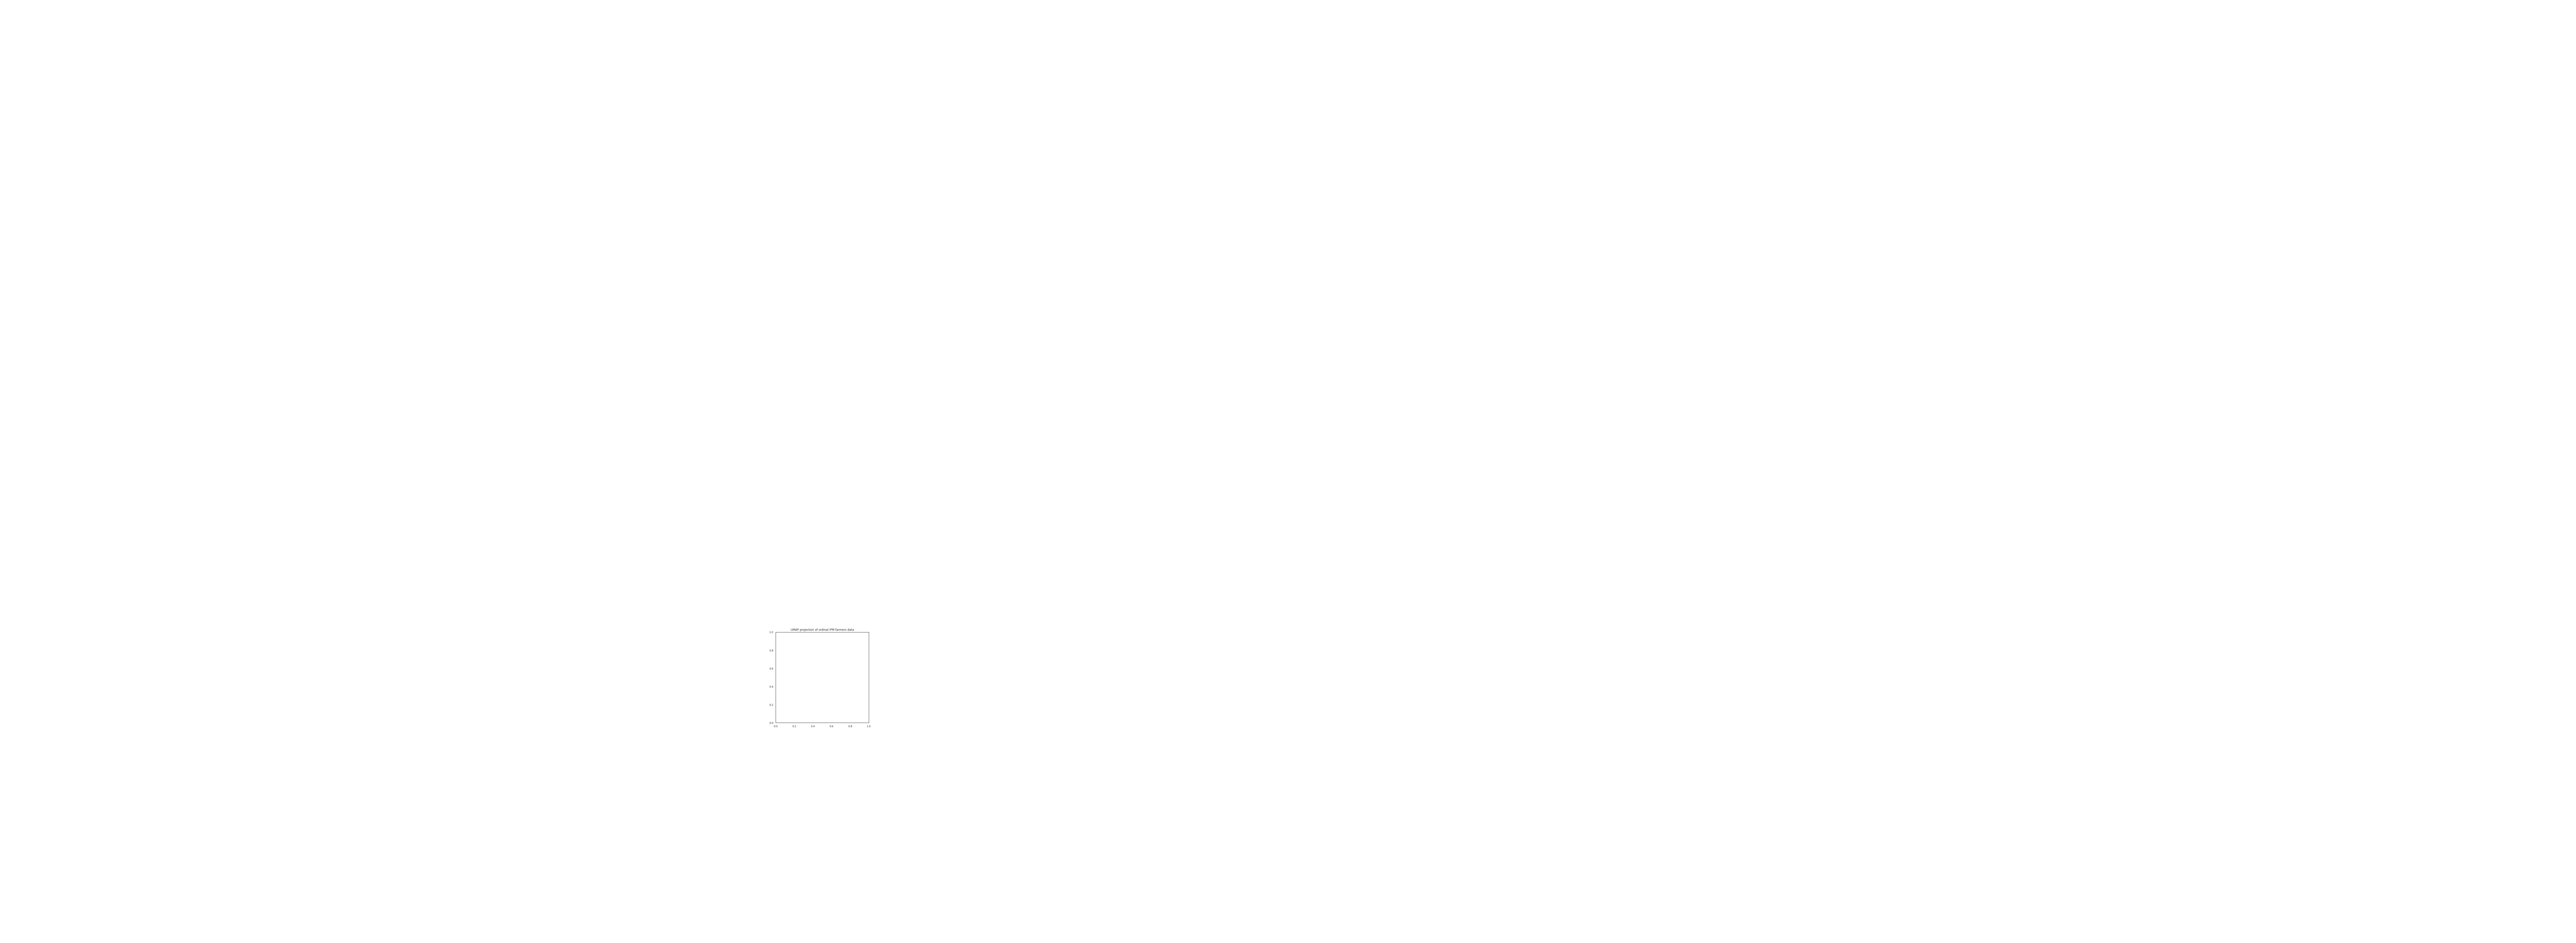

In [23]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=2, metric="chebyshev", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

#ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of ordinal IPM farmers data')

### Nominal features

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



Text(0.5, 1.0, 'UMAP projection of nominal IPM farmers data')

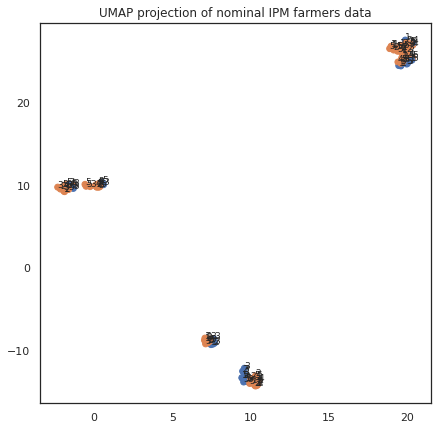

In [24]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="dice", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in nom_df['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of nominal IPM farmers data')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [25]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

KeyError: ignored

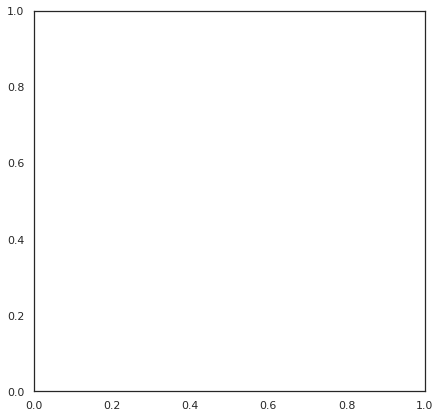

In [26]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['How_do_you_access_DSS_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers intersection data')

In [ ]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['How_do_you_access_DSS_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers union data')

# CLUSTERING

Probaj clustering brez dim reduction

In [ ]:
# k-means clustering 2D intersection emnbedding
km_inters_clusters = cluster.KMeans(n_clusters=3).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=km_inters_clusters, s=30, cmap='cool')

# Add cluster text
for i, val in enumerate(km_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)
plt.title('K-means clusters of UMAP projection of IPM farmers intersection data')

In [ ]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=2)
hdbscan_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_inters_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers intersection data')

In [ ]:
# kmeans clustering 2D union emnbedding
km_union_clusters = cluster.KMeans(n_clusters=3).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

plt.title('K-means clusters of UMAP projection of IPM farmers union data')

In [ ]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers union data')

## Interactive 3D Visualisation

In [ ]:
# 3D embedding
ord_reducer3d = umap.UMAP(n_neighbors=8, min_dist=0.1, n_components=3, metric="manhattan", random_state=123)
ord_embedding3d = ord_reducer3d.fit_transform(ordnum_df)

nom_reducer3d = umap.UMAP(n_neighbors=8, min_dist=0.1, n_components=3, metric="jaccard", random_state=123)
nom_embedding3d = nom_reducer3d.fit_transform(nom_df)

# combine mappings
intersection_embedding3d = nom_embedding3d * ord_embedding3d
union_embedding3d = nom_embedding3d + ord_embedding3d

#hdbscan intersection and union
intersection_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(intersection_embedding3d)
union_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(union_embedding3d)
print("intersection_clusters :", intersection_clusters)
print("union_clusters :", union_clusters)

# # hdbscan separate ordinal and nominal data
# ord_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(ord_embedding3d)
# nom_clusters = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=10).fit_predict(nom_embedding3d)
# print("ord_clusters :", ord_clusters)
# print("nom_clusters :", nom_clusters)

### Plotly visualisation

In [ ]:
# 3D dataframes for intersection and union
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

In [ ]:
### individual nom_embedding3d and ord_embedding3d projection###

# # 3D dataframes
# ord_embedding3d_df = pd.DataFrame(data=ord_embedding3d, columns=["x", "y", "z"])
# ord_embedding3d_df["clusters"] = list(map(str, ord_clusters))
# nom_embedding3d_df = pd.DataFrame(data=nom_embedding3d, columns=["x", "y", "z"])
# nom_embedding3d_df["clusters"] = list(map(str, nom_clusters))


In [ ]:
# # Ordinal data embedding cluster visualisation 
# fig = px.scatter_3d(ord_embedding3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.8, 
#                     title="Ordinal data 3D embedding of farmers IPM data")
# fig.show()

In [ ]:
# Nominal data embedding cluster visualisation 
# fig = px.scatter_3d(nom_embedding3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.8, 
#                     title="Nominal data 3D embedding of farmers IPM data")
# fig.show()

In [ ]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.8, 
                    title="Intersection 3D embedding of farmers IPM data")
fig.show()

In [ ]:
fig.write_html("IPM_DataEmbedding_q3.html")

In [ ]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.5, 
                    title="Union 3D embedding of farmers IPM data")
fig.write_html("/content/plotly1.html")
fig.show()

Validate clusters Which Metrics?

# Cluster explanation 

In [ ]:
# DataFrame for classification with clusters from embedding3d
df_noNaN["clusters"] = intersection_clusters
df_clst = df_noNaN.copy()
df_clst

# use Weka and See5 (Quinlan) [moraš poklicat s !]
# https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn

In [ ]:
df_clst.to_csv("IPM_data&clusters_question3.csv")

## Modelling

In [ ]:
from sklearn import tree

target_class = "clusters"
X, y = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]], df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(_) for _ in [0,1,2,3]], filled=True) 

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_class = "clusters"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
y = df_noNaN[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# Predictions for test dataset
y_predict = model.predict(X_test)
y_predict

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = clf.fit(X, Y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

In [ ]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [ ]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})